In [1]:
#Loading in essentials
import pandas as pd
import numpy as np

In [35]:
dataset = pd.read_csv("GlobalLandTemperaturesByCity.csv", index_col=0, parse_dates=['dt'])
dataset.head(20)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [36]:
dataset["AverageTemperature"] = dataset["AverageTemperature"].interpolate(method='time')
dataset["AverageTemperatureUncertainty"] = dataset["AverageTemperatureUncertainty"].interpolate(method='time')
dataset.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.599212e+06,8.599212e+06
mean,1.657916e+01,1.068112e+00
std,1.039822e+01,1.143335e+00
min,-4.270400e+01,3.400000e-02
25%,9.960000e+00,3.450000e-01
50%,1.865700e+01,6.270000e-01
75%,2.513800e+01,1.434000e+00
max,3.965100e+01,1.539600e+01


In [37]:
dataset.drop('Latitude', axis=1, inplace=True)
dataset.drop('Longitude', axis=1, inplace=True)
dataset.drop('City', axis=1, inplace=True)
dataset = dataset[dataset['Country'] == 'Denmark']
dataset

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,6.068000,1.737000,Denmark
1743-12-01,7.094947,1.986487,Denmark
1744-01-01,6.634026,2.227757,Denmark
1744-02-01,6.173105,2.469026,Denmark
1744-03-01,5.741921,2.694730,Denmark
...,...,...,...
2013-05-01,12.774000,0.426000,Denmark
2013-06-01,15.685000,0.370000,Denmark
2013-07-01,18.735000,0.441000,Denmark


In [124]:
temp_denmark = dataset[["AverageTemperature", "AverageTemperatureUncertainty"]]
temp_denmark

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1743-11-01,6.068000,1.737000
1743-12-01,7.094947,1.986487
1744-01-01,6.634026,2.227757
1744-02-01,6.173105,2.469026
1744-03-01,5.741921,2.694730
...,...,...
2013-05-01,12.774000,0.426000
2013-06-01,15.685000,0.370000
2013-07-01,18.735000,0.441000


<Axes: xlabel='dt'>

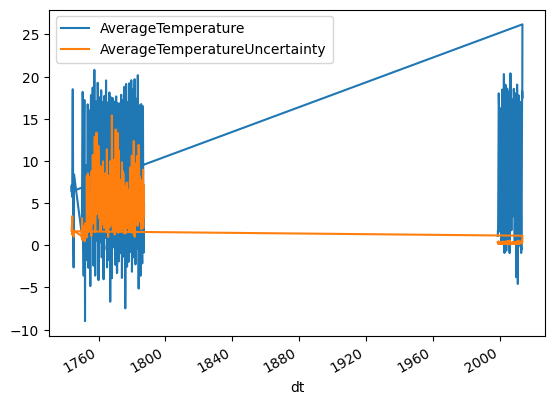

In [125]:
temp_denmark[6300:7000].plot()

In [126]:
from statsmodels.tsa.stattools import adfuller

In [127]:
temp_denmark = temp_denmark.groupby(temp_denmark.index).mean()
temp_denmark.index = temp_denmark.index.to_period('M').to_timestamp('M')

In [128]:
adfuller(temp_denmark['AverageTemperature'], autolag = 'BIC')

(-7.008885725564327,
 7.005137305305644e-10,
 23,
 3215,
 {'1%': -3.4323856232770664,
  '5%': -2.8624394154978363,
  '10%': -2.5672487787611047},
 12696.249791199944)

In [129]:
adfuller(temp_denmark['AverageTemperatureUncertainty'], autolag = 'BIC')

(-1.6120280785757497,
 0.47691106602470507,
 23,
 3215,
 {'1%': -3.4323856232770664,
  '5%': -2.8624394154978363,
  '10%': -2.5672487787611047},
 10024.219583890776)

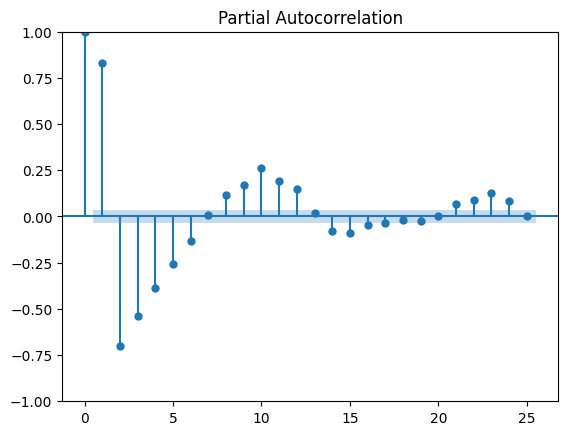

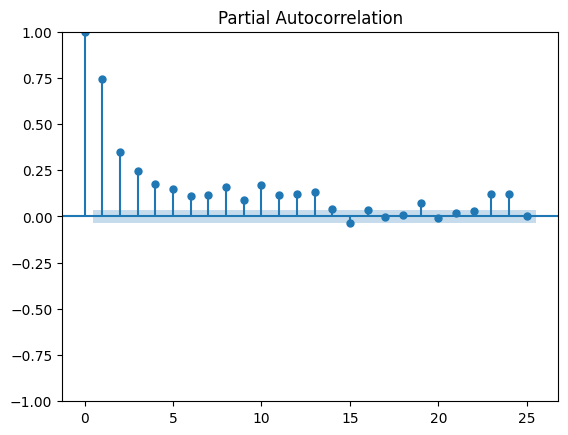

In [130]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf_temp = plot_pacf(temp_denmark['AverageTemperature'], lags = 25)
pacf_uncertainity = plot_pacf(temp_denmark['AverageTemperatureUncertainty'], lags = 25)

In [131]:
temp_only_denmark = temp_denmark["AverageTemperature"]
# Convert the index to month-end frequency without filling missing values
temp_only_denmark

dt
1743-11-30     6.221000
1743-12-31     7.094947
1744-01-31     6.634026
1744-02-29     6.173105
1744-03-31     5.741921
                ...    
2013-05-31    12.772000
2013-06-30    15.454000
2013-07-31    18.497000
2013-08-31    17.745000
2013-09-30    26.195000
Freq: ME, Name: AverageTemperature, Length: 3239, dtype: float64

In [132]:
train = temp_only_denmark[:len(temp_only_denmark)-12]
test = temp_only_denmark[len(temp_only_denmark)-12:]

In [139]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags= 5).fit()

In [140]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:     AverageTemperature   No. Observations:                 3227
Model:                     AutoReg(5)   Log Likelihood               -6704.493
Method:               Conditional MLE   S.D. of innovations              1.938
Date:                Tue, 06 Feb 2024   AIC                          13422.985
Time:                        11:41:48   BIC                          13465.530
Sample:                    04-30-1744   HQIC                         13438.233
                         - 09-30-2012                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.8748      0.114     51.658      0.000       5.652       6.098
AverageTemperature.L1     0.7394      0.017     43.404      0.000       0.706       0.773
AverageT

In [141]:
print(len(train))

3227


In [142]:
pred = model.predict(start=len(train), end=len(temp_only_denmark)-1, dynamic=False)

2012-10-31     9.098404
2012-11-30     4.822909
2012-12-31     0.960417
2013-01-31    -1.010060
2013-02-28    -0.412446
2013-03-31     2.261362
2013-04-30     6.244652
2013-05-31    10.563344
2013-06-30    14.024749
2013-07-31    15.704734
2013-08-31    15.237164
2013-09-30    12.810047
Freq: ME, dtype: float64


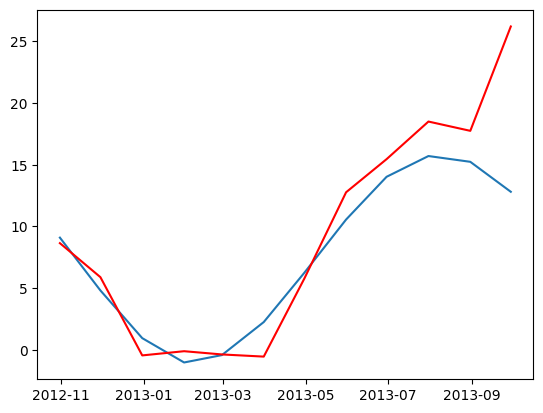

In [145]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color = 'red')
print(pred)

2013-11-30     5.142000
2013-12-31     1.978784
2014-01-31     0.427041
2014-02-28     0.851068
2014-03-31     3.085339
2014-04-30     6.488633
2014-05-31    10.128084
2014-06-30    13.035275
2014-07-31    14.462245
2014-08-31    14.072825
2014-09-30    12.020554
2014-10-31     8.894363
Freq: ME, dtype: float64


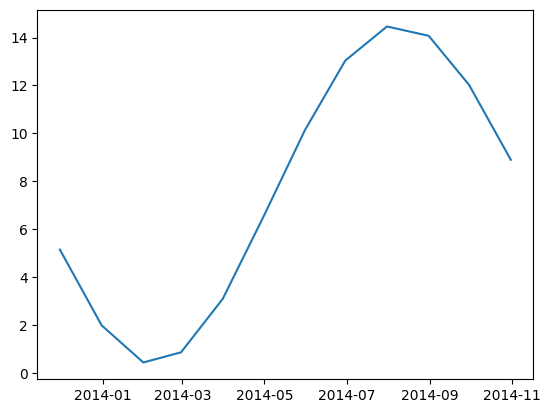

In [148]:
pred_future=model.predict(start=len(temp_only_denmark)+1,end=len(temp_only_denmark)+12, dynamic=False)
pyplot.plot(pred_future)
print(pred_future)